## Investigation of Trends in Electricity Generation in the U.S.A with a Focus on the Effects of the Climate Urgency, Population and Efficiency on the Deployment of Different Energy Sources
- **Author**: Clifford Okwudili Aniakor
- **Date**: 5th September, 2022

## Introduction
The energy data used pulled from the [United States' Energy Information Administration (EIA)](https://www.eia.gov/) while population data was extracted from [Wikipedia](https://https://en.wikipedia.org/wiki/Wikipedia:About).

The columns present in the first dataset include: 
- YEAR: Year in electricity generation record
- STATE: State in the U.S.A
- TYPE OF PRODUCER: Subsets of the electrical power industry e.g. combined heat
- ENERGY SOURCE: Primary energy e.g natural gas, coal
- Generation (Megawatthours): Electricity generated in megawatthours

The columns present in the second dataset include:
- State: State in the U.S.A
- Population_2020: Population of U.S. state in 2020
- Latitude: Coordinate that specifies the north–south position on the Earth 
- Longitude: Coordinate that specifies the east–west position on the Earth
- Land_Area_Sqkm: terrestial extent unoccupied by water of the U.S. State

The data required little cleaning. After cleaning, the following questions were asked and anwered:
- What has been the trend of the various energy sources in electricity generation from 1990-2020?
- Rank up the total electricity generated by each state from 1990-2020. Which states have the highest and lowest generations?
-Rank up the total electricity generated by each state from different energy sources in 2020
- Classify the states based on how efficient and conservative their respective residential and commercial end-use sectors consume generated electricity. Visualize your classification.
- How fast are US states in phasing-out coal since COP21? Compare the use of coal by all states for electricity generation before and after the adoption of the Paris Agreement(i.e 2015 vs 2020)
- How fast are U.S. states adopting natural gas as a transition fuel since COP21? Compare the use of natural gas by all states for electricity generation before and after the adoption of the Paris Agreement(i.e 2015 vs 2020)
- How green has U.S. states' electricity generation been since COP21? Compare the use of renewable energy by all states for electricity generation before and after the adoption of the Paris Agreement(i.e 2015 vs 2020)
- How pink has the U.S. states' electricity generation been since COP21? Compare the use of nuclear energy by all states for electricity generation before and after the adoption of the Paris Agreement(i.e 2015 vs 2020)
- For the High-Efficient states, how clean has their electricity been since the adoption of the Paris Agreement? Combine the electricity generated from renewables, nuclear and natural gas for 2015 and 2020 and compare.
- For the Low-Efficient states, how clean has their electricity been since the adoption of the Paris Agreement? Combine the electricity generated from renewables, nuclear and natural gas for 2015 and 2020 and compare.
- Was the electricity generated dependent on the population in 2020? How?



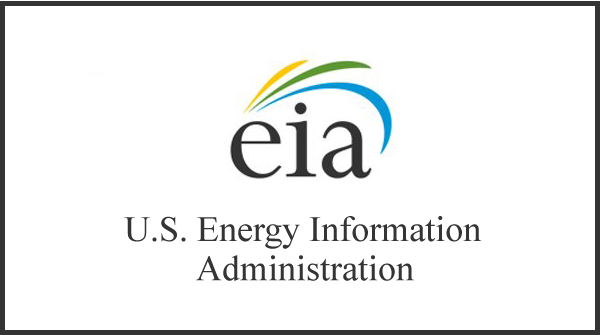

In [245]:
#Install and update packages
! pip install --upgrade pandas
! pip install --upgrade xlrd
! pip install chart-studio
! pip install --upgrade plotly
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [617]:
#import packages
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import kaleido
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "svg"
%matplotlib inline

In [618]:
#load file into pandas dataframe
energy=pd.read_excel("annual_generation_state.xls", skiprows=1)

In [619]:
#Read 2nd file into pandas dataframe
census=pd.read_excel("NST-EST2021-POP.xlsx",sheet_name="Sheet1")

## Visual and Programmatic Assessments of the 2 dataframes

In [620]:
energy.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,1990,AK,Total Electric Power Industry,Total,5599506.0
1,1990,AK,Total Electric Power Industry,Coal,510573.0
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
4,1990,AK,Total Electric Power Industry,Petroleum,497116.0


In [621]:
energy.tail()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
55881,2020,WY,"Electric Generators, Electric Utilities",Coal,32361811.0
55882,2020,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,1075863.0
55883,2020,WY,"Electric Generators, Electric Utilities",Natural Gas,647464.0
55884,2020,WY,"Electric Generators, Electric Utilities",Petroleum,44556.0
55885,2020,WY,"Electric Generators, Electric Utilities",Wind,2563506.0


In [622]:
energy.sample(14,random_state=1)

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
18499,2001,US-TOTAL,Total Electric Power Industry,Geothermal,1.374050e+07
33068,2009,US-TOTAL,"Electric Generators, Electric Utilities",Other Biomass,1.311695e+06
24870,2005,ME,"Combined Heat and Power, Electric Power",Natural Gas,1.531000e+03
24779,2005,MA,"Electric Generators, Independent Power Producers",Other Biomass,1.113766e+06
8078,1995,MD,"Combined Heat and Power, Industrial Power",Coal,2.253510e+05
39927,2013,MA,"Electric Generators, Independent Power Producers",Hydroelectric Conventional,7.118080e+05
36764,2011,SC,Total Electric Power Industry,Total,1.029726e+08
46950,2016,SC,"Combined Heat and Power, Commercial Power",Hydroelectric Conventional,1.798000e+03
41652,2014,GA,"Electric Generators, Electric Utilities",Coal,4.484430e+07
44585,2015,NV,"Combined Heat and Power, Electric Power",Petroleum,1.600000e+01


In [623]:
#dataframe dimensions
energy.shape

(55886, 5)

In [624]:
#summary of dataframe properties
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55886 entries, 0 to 55885
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        55886 non-null  int64  
 1   STATE                       55886 non-null  object 
 2   TYPE OF PRODUCER            55886 non-null  object 
 3   ENERGY SOURCE               55886 non-null  object 
 4   GENERATION (Megawatthours)  55886 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [625]:
#view number of unique states entries
energy.STATE.value_counts()

CA          1813
MI          1592
PA          1525
NY          1495
US-TOTAL    1460
NC          1401
WI          1386
VA          1373
TX          1366
WA          1356
FL          1347
MN          1345
IL          1319
MA          1315
OH          1267
NJ          1235
MD          1203
ME          1198
SC          1194
GA          1160
CT          1152
TN          1141
CO          1138
IA          1120
OR          1087
IN          1082
MO          1068
LA          1051
AR          1035
UT          1018
HI          1017
AL           995
OK           994
NH           965
AZ           961
WV           929
ID           857
MT           828
NV           824
AK           817
MS           791
NE           785
NM           768
VT           711
WY           706
DE           694
ND           683
KS           667
RI           665
US-Total     659
KY           630
SD           505
DC           190
               3
Name: STATE, dtype: int64

In [626]:
energy["ENERGY SOURCE"].value_counts()

Total                             8628
Natural Gas                       7717
Petroleum                         7421
Coal                              5693
Other Biomass                     5162
Hydroelectric Conventional        4703
Wood and Wood Derived Fuels       3554
Other                             3298
Wind                              2238
Other Gases                       2176
Nuclear                           2056
Solar Thermal and Photovoltaic    1542
Pumped Storage                    1241
Geothermal                         457
Name: ENERGY SOURCE, dtype: int64

In [627]:
energy.YEAR.value_counts()

2020    2129
2019    2124
2018    2114
2017    2095
2016    2074
2014    2057
2015    2048
2013    2020
2012    1987
2011    1949
2010    1933
2009    1891
2008    1874
2007    1825
2006    1812
2005    1799
2004    1796
2003    1783
2002    1775
2001    1713
2000    1655
1999    1612
1998    1607
1997    1590
1996    1574
1995    1564
1994    1543
1993    1521
1992    1503
1991    1473
1990    1446
Name: YEAR, dtype: int64

In [628]:
energy["TYPE OF PRODUCER"].value_counts()

Total Electric Power Industry                       15350
Electric Generators, Electric Utilities             11013
Combined Heat and Power, Industrial Power            9308
Electric Generators, Independent Power Producers     8943
Combined Heat and Power, Commercial Power            5908
Combined Heat and Power, Electric Power              5364
Name: TYPE OF PRODUCER, dtype: int64

In [629]:
census.head()

,State,Population_2020,Land_Area_sqkm
0,Alabama,5024803,131171
1,Alaska,732441,1477953
2,Arizona,7177986,294207
3,Arkansas,3012232,134771
4,California,39499738,403466


In [630]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            51 non-null     object
 1   Population_2020  51 non-null     int64 
 2   Land_Area_sqkm   51 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [631]:
census.State.value_counts()

Alabama                 1
Pennsylvania            1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Rhode Island            1
Montana                 1
South Carolina          1
South Dakota            1
Tennessee               1
Texas                   1
Utah                    1
Vermont                 1
Virginia                1
Washington              1
West Virginia           1
Wisconsin               1
Nebraska                1
Missouri                1
Alaska                  1
Idaho                   1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Illinois    

## Quality Issues
- Title-cased and Upper-cased column headers in energy and census dataframe
- Spaces in column headers
- Inconsitent data entries in state column (US-TOTAL and US-Total)
- Wrong Datatypes for year, state, type of producer and energy source columns
- Non-US code readers might find it difficult identifying state actual names



## Data Cleaning

### Define
- Convert column headers in energy and census dataframes to lowercase
- Replace spaces with underscores in energy dataframe

### Code

In [632]:
#replace spaces and convert to lowercase
energy.columns=energy.columns.str.replace(" ","_").str.lower()

In [633]:
energy.columns=['year','state','type_of_producer','energy_source','electricity_generated']

In [634]:
#convert to lowercase
census.columns=census.columns.str.lower()

### Test

In [635]:
energy.columns

Index(['year', 'state', 'type_of_producer', 'energy_source',
       'electricity_generated'],
      dtype='object')

In [636]:
census.columns

Index(['state', 'population_2020', 'land_area_sqkm'], dtype='object')

### Define
- Replace US-Total with US-TOTAL

### Code

In [637]:
energy.state=energy.state.replace("US-Total","US-TOTAL")

### Test

In [638]:
energy.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'US-TOTAL', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', '  '],
      dtype=object)

### Define
- Convert columns to categorical variables

### Code

In [639]:
energy[['year','state','type_of_producer','energy_source']]=energy[['year','state','type_of_producer','energy_source']].astype('category')

### Test

In [640]:
energy.dtypes

year                     category
state                    category
type_of_producer         category
energy_source            category
electricity_generated     float64
dtype: object

### Define
- Rename US states to full for Non-US code readers

### Code

In [641]:
energy.replace({"state":{"AL":"Alabama","KY":"Kentucky","OH":"Ohio","AK":"Alaska","LA":"Louisiana","OK":"Oklahoma","AZ":"Arizona",
                         "ME":"Maine","OR":"Oregon","AR":"Arkansas","MD":"Maryland","PA":"Pennsylvania","MA":"Massachusetts",
                         "CA":"California","MI":"Michigan","RI":"Rhode Island","CO":"Colorado","MN":"Minnesota","SC":"South Carolina",
                         "CT":"Connecticut","MS":"Mississippi","SD":"South Dakota","DE":"Delaware","MO":"Missouri","TN":"Tennessee","DC":"District of Columbia",
                         "MT":"Montana","TX":"Texas","FL":"Florida","NE":"Nebraska","GA":"Georgia","NV":"Nevada","UT":"Utah", 
                         "NH":"New Hampshire","VT":"Vermont","HI":"Hawaii","NJ":"New Jersey","VA":"Virginia","ID":"Idaho","NM":"New Mexico","VI":"Virgin Islands", 
                         "IL":"Illinois","NY":"New York","WA":"Washington","IN":"Indiana","NC":"North Carolina","WV":"West Virginia","IA":"Iowa","ND":"North Dakota", 
                         "WI":"Wisconsin","KS":"Kansas","WY":"Wyoming"}},inplace=True)

### Test

In [642]:
energy.state.value_counts()

US-TOTAL                2119
California              1813
Michigan                1592
Pennsylvania            1525
New York                1495
North Carolina          1401
Wisconsin               1386
Virginia                1373
Texas                   1366
Washington              1356
Florida                 1347
Minnesota               1345
Illinois                1319
Massachusetts           1315
Ohio                    1267
New Jersey              1235
Maryland                1203
Maine                   1198
South Carolina          1194
Georgia                 1160
Connecticut             1152
Tennessee               1141
Colorado                1138
Iowa                    1120
Oregon                  1087
Indiana                 1082
Missouri                1068
Louisiana               1051
Arkansas                1035
Utah                    1018
Hawaii                  1017
Alabama                  995
Oklahoma                 994
New Hampshire            965
Arizona       

## What has been the trend of the various energy sources in electricity generation from 1990-2020?

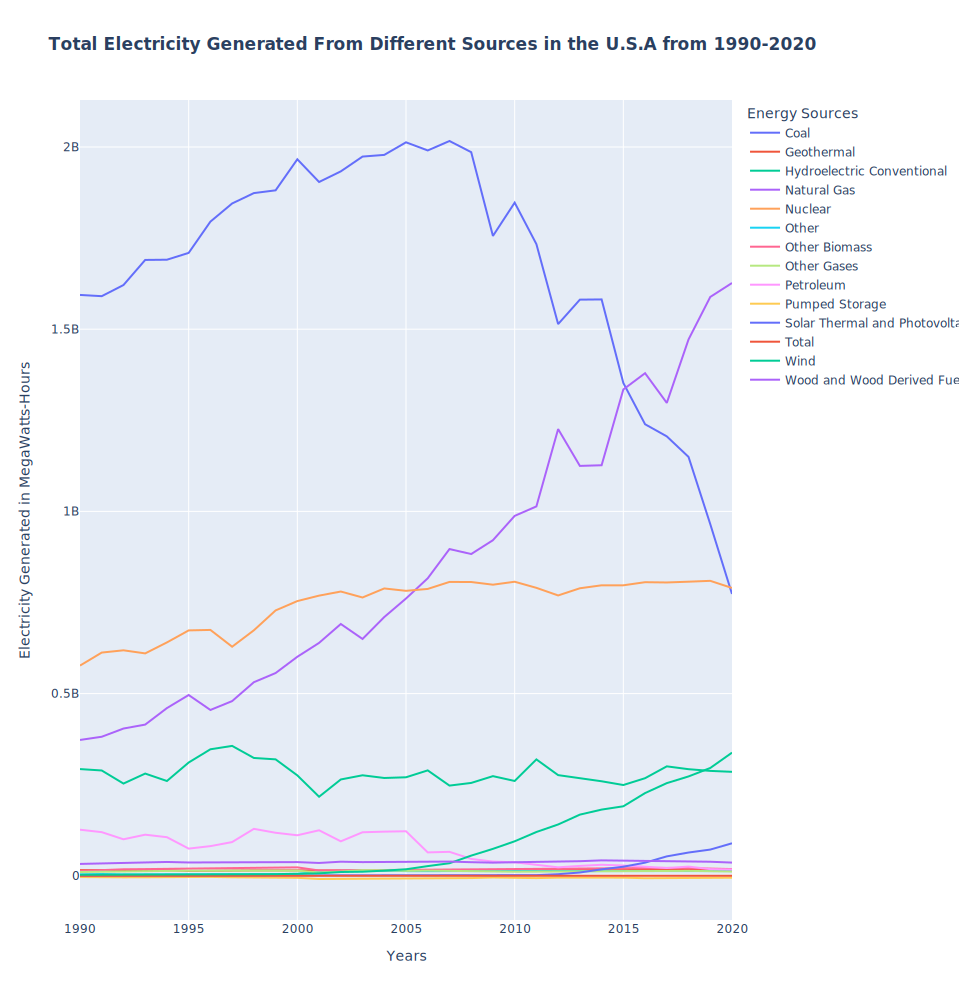

In [643]:
# Select total electricity generated in all states by all electric power industries
energyss=energy[(energy['state']=="US-TOTAL") & (energy['energy_source']!="Total")&(energy["type_of_producer"]=="Total Electric Power Industry")]
energyrs=energyss.groupby(["year","energy_source"]).sum().electricity_generated.reset_index()
px.line(energyrs, x="year",y="electricity_generated",color="energy_source",width=970, height=1000,
         title="<b>Total Electricity Generated From Different Sources in the U.S.A from 1990-2020</b>",
       labels={"year":" Years","electricity_generated":"Electricity Generated in MegaWatts-Hours","energy_source":"Energy Sources"})

In 2007, Coal-fired electricity peaked at 2.0164 billion megawatthours before taking a deep dive and amounting to 773.39 billion megawatthours in 2020. In 2016, natural gas-fired electricity exceeded coal-fired electricity. Since 2019, only natural-gas fired electricity was reaching billion megawatthours.This was after the intersection in 2015 and COP21. In 2020, Nuclear electricity generation also exceeded coal-fired electricity by generating 789.88 Million megatthours. Wind started rising steadily in 2003 and then sharply in 2015. In 2019, electricity generated from wind sources exceeded hydroelectricity and went on to generate 337.938 million megawatthours in 2020. Solar thermal and photovoltaic has also seen a steady increase since 2010. Petroleum-fired electricity started plummetting in 2005 after peaking in 1998. Electricity generated from petroleum, other gases (blast furnace gas, propane gas, other manufactured and waste gases derived from fossil fuels) and other energy sources(non-biogenic municipal solid waste, batteries, chemicals, hydrogen, pitch, purchased steam, sulphur, tire-derived fuels, and miscellaneous technologies) were all below 20 million megawatthours since 2019.

## What has been the trend of the various energy sources in electricity generation from 1990-2020 (grouping renewables)?

In [644]:
#create a copy
energyrr=energyrs.copy()
#replace all renewable sources with the primary term renewables
energyrr.energy_source.replace(['Hydroelectric Conventional','Other Biomass',
                                      'Wood and Wood Derived Fuels','Wind','Pumped Storage',
                                      'Solar Thermal and Photovoltaic','Geothermal'],
                                     'Renewables', inplace=True)
energyrr.energy_source.value_counts()

Renewables     217
Coal            31
Natural Gas     31
Nuclear         31
Other           31
Other Gases     31
Petroleum       31
Total           31
Name: energy_source, dtype: int64

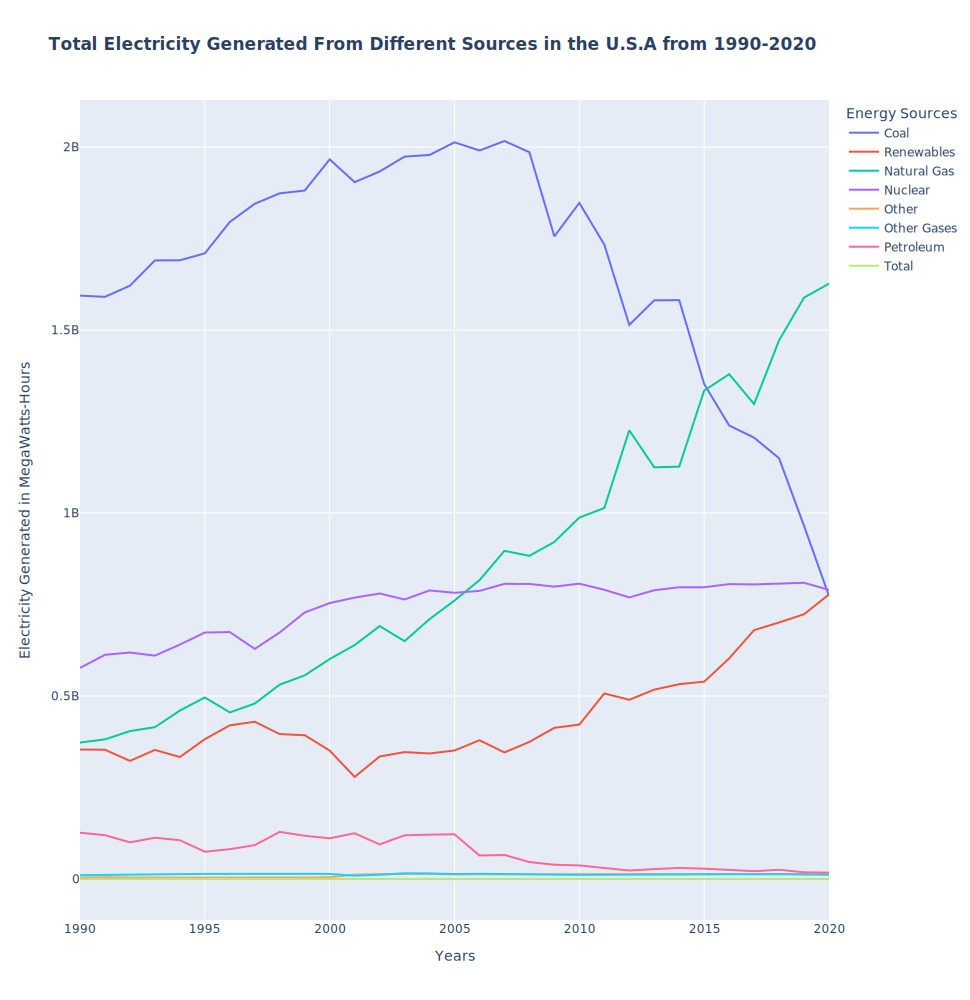

In [645]:
#Obtain total energy generated for each energy source in each year and pass to a dataframe
energyrr=energyrr.groupby(["year","energy_source"]).sum().electricity_generated.reset_index()
#plot
px.line(energyrr, x="year",y="electricity_generated",color="energy_source",width=970, height=1000,
        title="<b>Total Electricity Generated From Different Sources in the U.S.A from 1990-2020</b>",
       labels={"year":" Years","electricity_generated":"Electricity Generated in MegaWatts-Hours","energy_source":"Energy Sources"})

In 2007, Coal-fired electricity peaked at 2.0164 billion megawatthours before taking a deep dive and amounting to 773.39 billion megawatthours in 2020. In 2016, natural gas-fired electricity exceeded coal-fired electricity. Since 2019, only natural-gas fired electricity was reaching billion megawatthours.This was after the intersection in 2015 and COP21. Renewables have maintained a steady increase since 2007 and exceeded coal-fired electricity in 2020 with electricity generation of about 777.69 Million megawatthours. In 2020, Nuclear electricity generation also exceeded coal-fired electricity by generating 789.88 Million megatthours. Petroleum-Fired electricity started plummetting in 2005 after peaking in 1998. Electricity generated from petroleum, other gases (blast furnace gas, propane gas, other manufactured and waste gases derived from fossil fuels) and other energy sources(non-biogenic municipal solid waste, batteries, chemicals, hydrogen, pitch, purchased steam, sulphur, tire-derived fuels, and miscellaneous technologies) were all below 20 million megawatthours since 2019.

## Rank up the total electricity generated by each state from 1990-2020. Which states have the highest and lowest generations?

In [646]:
#Select entries for all states excluding combined US totals
energys=energy[(energy['state']!="US-TOTAL") &(energy['energy_source']!="Total")&(energy["type_of_producer"]=="Total Electric Power Industry")]

In [647]:
#Sum all electricity generated by all states and arrange in descending order
energys.groupby(['state']).electricity_generated.sum().sort_values(ascending=False)

state
Texas                   1.201110e+10
Pennsylvania            6.424035e+09
Florida                 6.307544e+09
California              5.995152e+09
Illinois                5.427099e+09
Ohio                    4.290508e+09
New York                4.230907e+09
Alabama                 4.041201e+09
Georgia                 3.757947e+09
North Carolina          3.674831e+09
Indiana                 3.553147e+09
Michigan                3.387864e+09
Washington              3.303698e+09
Arizona                 2.968679e+09
Louisiana               2.870138e+09
South Carolina          2.848780e+09
Kentucky                2.712972e+09
Tennessee               2.660961e+09
West Virginia           2.527889e+09
Missouri                2.452895e+09
Virginia                2.312272e+09
Oklahoma                2.026717e+09
Wisconsin               1.836034e+09
New Jersey              1.824402e+09
Oregon                  1.661171e+09
Arkansas                1.608613e+09
Minnesota               1.591260

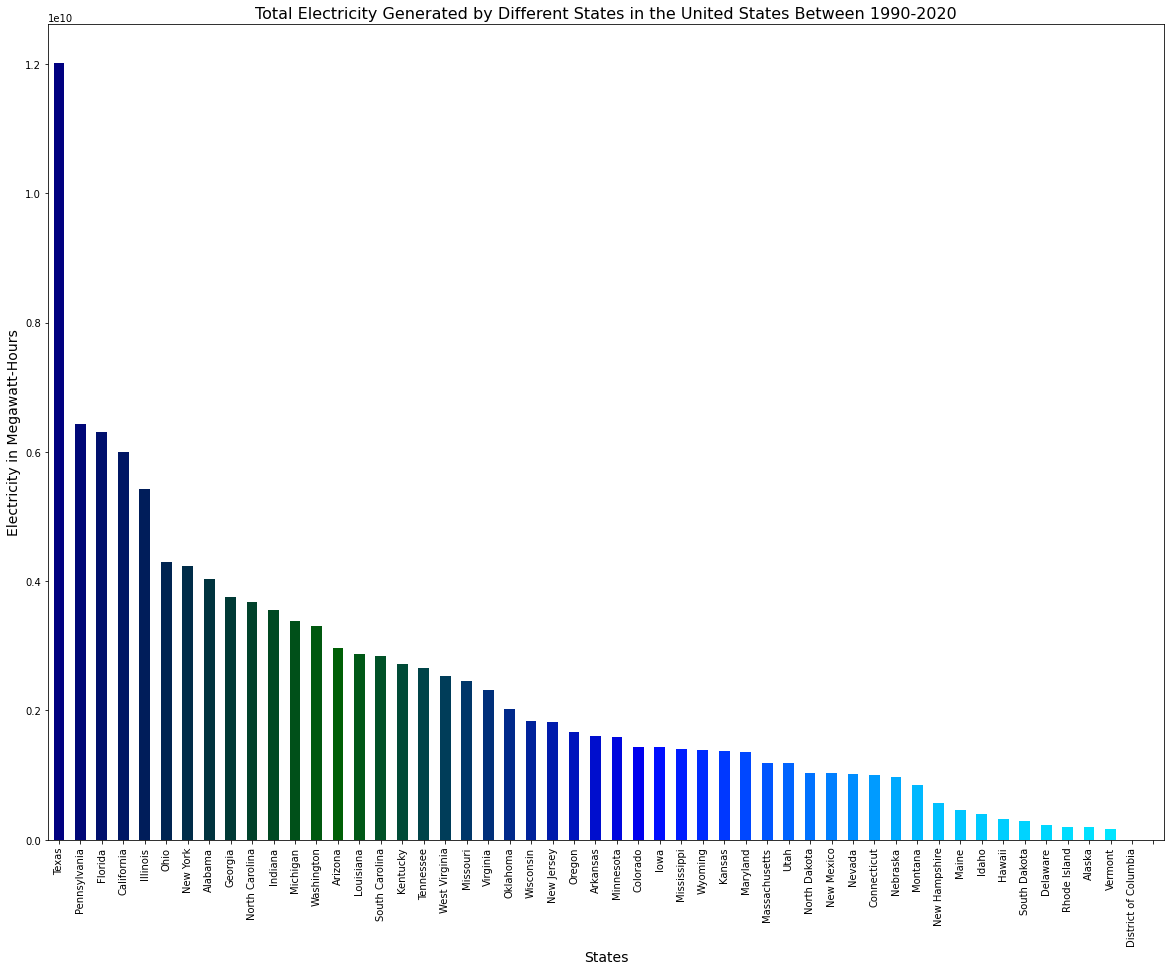

In [648]:
#Visualize groupby result
plt.figure(figsize=(20,15))
energys_sub=energys.groupby(['state']).electricity_generated.sum().sort_values(ascending=False)
energys_sub.plot(kind='bar',color=plt.cm.gist_ncar(np.arange(len(energys_sub))))
plt.ylabel("Electricity in Megawatt-Hours",fontsize=14)
plt.xlabel("States",fontsize=14)
plt.title("Total Electricity Generated by Different States in the United States Between 1990-2020",fontsize=16);

The cumulative electricity generated from 1990-2020 shows Texas leading with about 12.1 billion megawatthours and the District of Columbia with the least cumulative electricity generation of about 4.3 million megawatthours. The cumulative electricity genered by Texas from 1990-2020 is twice that of California. Colorado and Iowa have the same approximated cumulative electricity generated of ~1.43 megawatthours

## Rank up the total electricity generated by each state in 2020. Which states have the highest and lowest generations? Compare to the 1990-2020 result

In [649]:
#Obtain the total electricity generated by different states in 2020
energys.query("year==2020").groupby(['state']).electricity_generated.sum().sort_values(ascending=False)

state
Texas                   473514929.0
Florida                 250827799.0
Pennsylvania            230143280.0
California              193083537.0
Illinois                173394525.0
Alabama                 137547376.0
New York                129430271.0
North Carolina          124363443.0
Ohio                    122538183.0
Georgia                 120128939.0
Washington              116114467.0
Arizona                 109305056.0
Michigan                106624720.0
Virginia                103056001.0
Louisiana               100773772.0
South Carolina           98528797.0
Indiana                  90072979.0
Oklahoma                 83367728.0
Tennessee                80566009.0
Missouri                 72567880.0
Mississippi              66581766.0
Oregon                   63624782.0
Kentucky                 63539828.0
Wisconsin                61448545.0
New Jersey               61106457.0
Iowa                     59636672.0
West Virginia            56661534.0
Minnesota             

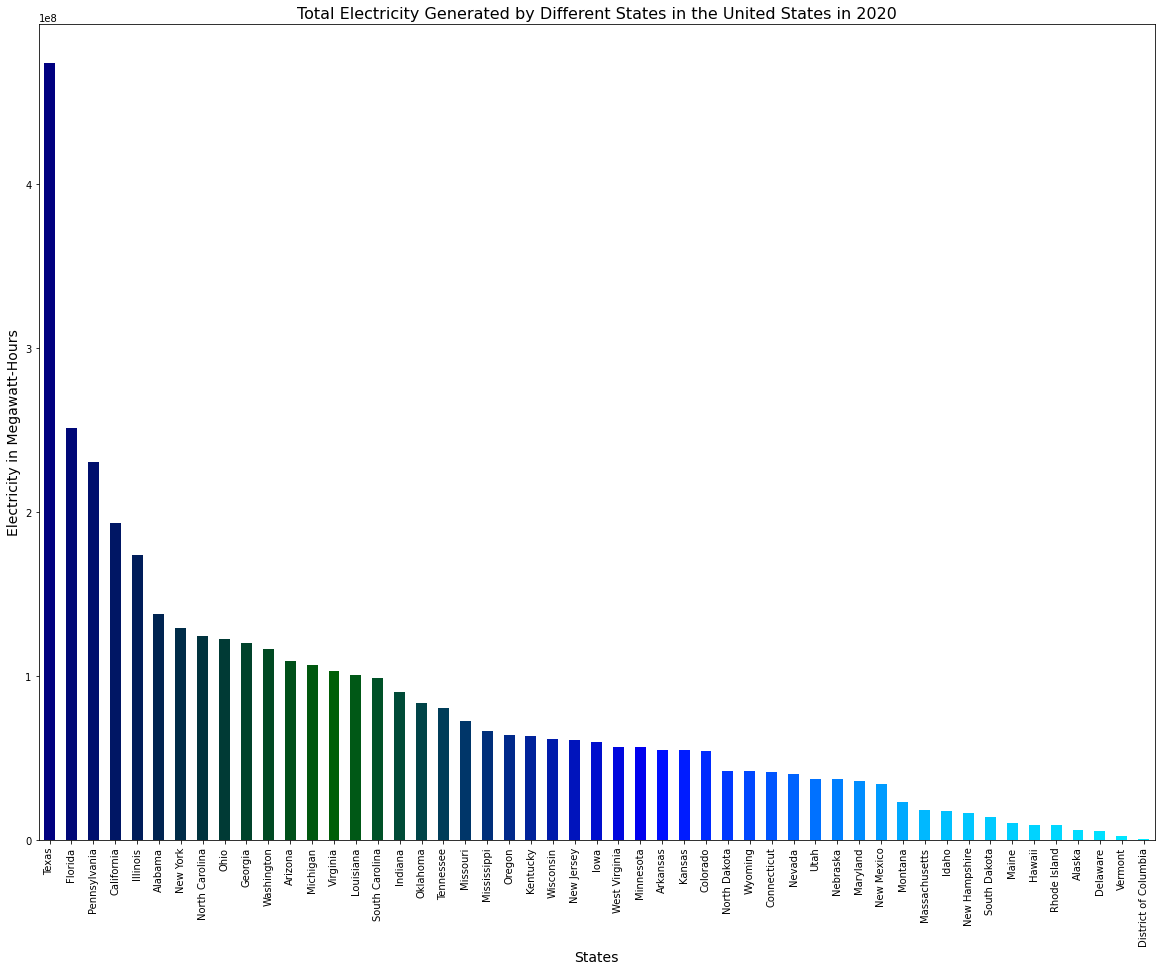

In [650]:
#Visualize groupby output
plt.figure(figsize=(20,15))
energys.query("year==2020").groupby(['state']).electricity_generated.sum().sort_values(ascending=False).plot(kind='bar',color=plt.cm.gist_ncar(np.arange(len(energys_sub))))
plt.ylabel("Electricity in Megawatt-Hours",fontsize=14)
plt.xlabel("States",fontsize=14)
plt.title("Total Electricity Generated by Different States in the United States in 2020",fontsize=16);

A similar trend is observed here when compared to the cummulative electricity generated with few exceptions. In 2020, Texas (~474 million megawatthours) generated the highest quantity of electricity with the District of Columbia (201 million megawatthours) generating the least.

## Rank up the total electricity generated by each state from different energy sources in 2020

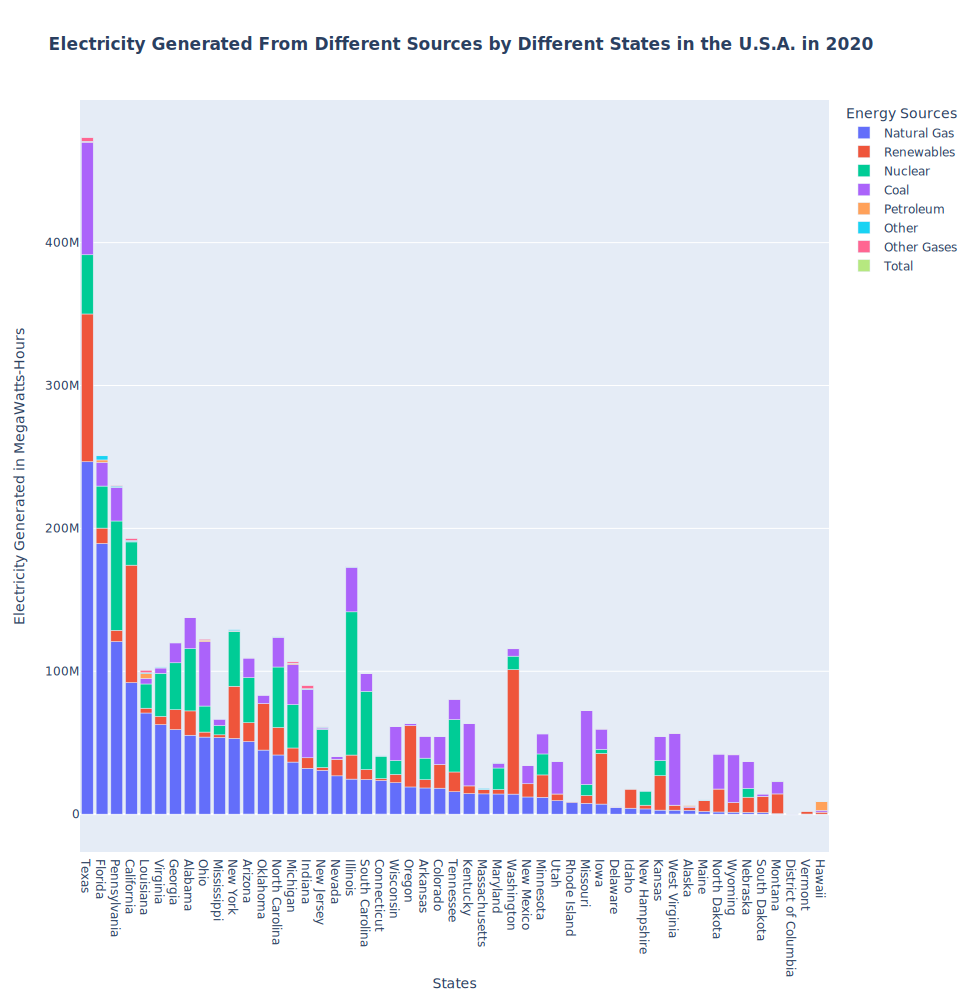

In [651]:
#create a copy of the dataframe
energyh=energys.copy()
#combine renewables
energyh.energy_source.replace(['Hydroelectric Conventional','Other Biomass','Wood and Wood Derived Fuels','Wind','Pumped Storage','Solar Thermal and Photovoltaic','Geothermal'],'Renewables', inplace=True)
energyt=energyh.query("year==2020").groupby(['state','energy_source']).electricity_generated.sum().sort_values(ascending=False).reset_index()
px.bar(energyt,x="state",y="electricity_generated",color="energy_source",width=970, height=1000,
       title="<b>Electricity Generated From Different Sources by Different States in the U.S.A. in 2020</b>",
       labels={"state":"States","electricity_generated":"Electricity Generated in MegaWatts-Hours","energy_source":"Energy Sources"})

In 2020, 19 states majorly sourced their electricity from natural gas namely: Texas,Florida, Pennsylvania, California, Louisiana, Virginia, Georgia, Alabama, Ohio, Mississippi, New York,  Arizona, Oklahoma, Michigan, New Jersey, Nevada, Connecticut, Arkansas and Massachusetts. While, renewables was the highest in 10 states namely: Oregon, Washington, Minnesota, Iowa, Idaho, Kansas, Maine, South Dakota, Montana and Vermont. Coal was also the most used electricity source in 10 states in 2020 namely: Wisconsin, Colorado, Kentucky, North Dakota, Wyoming, Nebraska, New Mexico, Utah, Indiana and West Virginia. Nuclear was the most used in 6 states: North Carolina, Illinois, South Carolina, Tennesssee, Maryland and New Hampshire.



## Classify the states based on how efficient and conservative their respective residential and commercial end-use sectors consume generated electricity. Visualize your classification.

The EIA stated that in 2020, 65% of energy generated for electricity is lossed by the electrical system.This leaves only 35% available for all end-use sectors (residential, commercial, industrial and transportation). Energy losses continues during the partitioning of the generated electricity to the different end-use sector. For the residential sector, after additional system losses only, 43% is available out of the 40% attributed to it. For the commercial sector, after additional system losses, only 50% is available out of the 35% attributed to it after system losses. This means that the combined residential and commercial end-use sectors enjoyed only 12.145% of electricity generated in 2020.
That is: [0.35x(0.40X0.43)+(0.35X0.50)]=0.12145

In [652]:
#Obtain the total electricity generated by each state in 2020
electrify=energys.query("year==2020").groupby(['state']).electricity_generated.sum().reset_index()
energy_elect=electrify["electricity_generated"]
#find similar states in the 2 dataframes census and energys
energy_metric=census.query("state in @energys.state")
#add new column containing total electricity generated to energy_metric
energy_metric["electricity_generated"]=electrify["electricity_generated"].to_numpy()
#create new column containing final electricity consumed by both the residential and commercial sector after all electrical losses
energy_metric["resandcommerc"]=energy_metric["electricity_generated"]*0.12145
#create new column containing the average final electricity per person
energy_metric["consumption_per_head"]=energy_metric["resandcommerc"]/energy_metric["population_2020"]
energy_metric

,state,population_2020,land_area_sqkm,electricity_generated,resandcommerc,consumption_per_head
0,Alabama,5024803,131171,137547376.0,1.670513e+07,3.324534
1,Alaska,732441,1477953,6276442.0,7.622739e+05,1.040731
2,Arizona,7177986,294207,109305056.0,1.327510e+07,1.849418
3,Arkansas,3012232,134771,54641259.0,6.636181e+06,2.203078
4,California,39499738,403466,193083537.0,2.345000e+07,0.593675
5,Colorado,5784308,268431,54115011.0,6.572268e+06,1.136224
6,Connecticut,3600260,12542,41190572.0,5.002595e+06,1.389509
7,Delaware,991886,5047,5205372.0,6.321924e+05,0.637364
8,District of Columbia,690093,158,201104.0,2.442408e+04,0.035392
9,Florida,21569932,138887,250827799.0,3.046304e+07,1.412292


In [653]:
energy_metric.consumption_per_head.describe()

count    51.000000
mean      1.813867
std       1.434612
min       0.035392
25%       1.149347
50%       1.444361
75%       2.177432
max       8.838605
Name: consumption_per_head, dtype: float64

In [654]:
#the classification will be built using the min,max,median,25th and 75th percentile
bin_edges=[0.035391,1.149347,1.444361,2.177432,8.838606]
#states with low consumption per head have high efficiency and vice versa
bin_names=['High Efficiency','Mid-High Efficiency','Medium Efficiency','Low Efficiency']
#build new column containing the classification
energy_metric['efficiency_level']=pd.cut(energy_metric["consumption_per_head"],bin_edges,labels=bin_names)
energy_metric

,state,population_2020,land_area_sqkm,electricity_generated,resandcommerc,consumption_per_head,efficiency_level
0,Alabama,5024803,131171,137547376.0,1.670513e+07,3.324534,Low Efficiency
1,Alaska,732441,1477953,6276442.0,7.622739e+05,1.040731,High Efficiency
2,Arizona,7177986,294207,109305056.0,1.327510e+07,1.849418,Medium Efficiency
3,Arkansas,3012232,134771,54641259.0,6.636181e+06,2.203078,Low Efficiency
4,California,39499738,403466,193083537.0,2.345000e+07,0.593675,High Efficiency
5,Colorado,5784308,268431,54115011.0,6.572268e+06,1.136224,High Efficiency
6,Connecticut,3600260,12542,41190572.0,5.002595e+06,1.389509,Mid-High Efficiency
7,Delaware,991886,5047,5205372.0,6.321924e+05,0.637364,High Efficiency
8,District of Columbia,690093,158,201104.0,2.442408e+04,0.035392,High Efficiency
9,Florida,21569932,138887,250827799.0,3.046304e+07,1.412292,Mid-High Efficiency


In [655]:
energy_metric.efficiency_level.value_counts()

High Efficiency        13
Medium Efficiency      13
Low Efficiency         13
Mid-High Efficiency    12
Name: efficiency_level, dtype: int64

In [656]:
#create new column with state initials
energy_metric["state_init"]=energy_metric.state.replace({"Alabama":"AL","Kentucky":"KY","Ohio":"OH","Alaska":"AK","Louisiana":"LA","Oklahoma":"OK","Arizona":"AZ",
                         "Maine":"ME","Oregon":"OR","Arkansas":"AR","Maryland":"MD","Pennsylvania":"PA","Massachusetts":"MA",
                         "California":"CA","Michigan":"MI","Rhode Island":"RI","Colorado":"CO","Minnesota":"MN","South Carolina":"SC",
                         "Connecticut":"CT","Mississippi":"MS","South Dakota":"SD","Delaware":"DE","Missouri":"MO","Tennessee":"TN","District of Columbia":"DC",
                         "Montana":"MT","Texas":"TX","Florida":"FL","Nebraska":"NE","Georgia":"GA","Nevada":"NV","Utah":"UT", 
                         "New Hampshire":"NH","Vermont":"VT","Hawaii":"HI","New Jersey":"NJ","Virginia":"VA","Idaho":"ID","New Mexico":"NM","Virgin Islands":"VI", 
                         "Illinois":"IL","New York":"NY","Washington":"WA","Indiana":"IN","North Carolina":"NC","West Virginia":"WV","Iowa":"IA","North Dakota":"ND", 
                         "Wisconsin":"WI","Kansas":"KS","Wyoming":"WY"})

In [657]:
#confirm
energy_metric[['state','state_init']]

,state,state_init
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [658]:
"States in the Continental United States by 2020's Electricity Consumption per Head"

"States in the Continental United States by 2020's Electricity Consumption per Head"

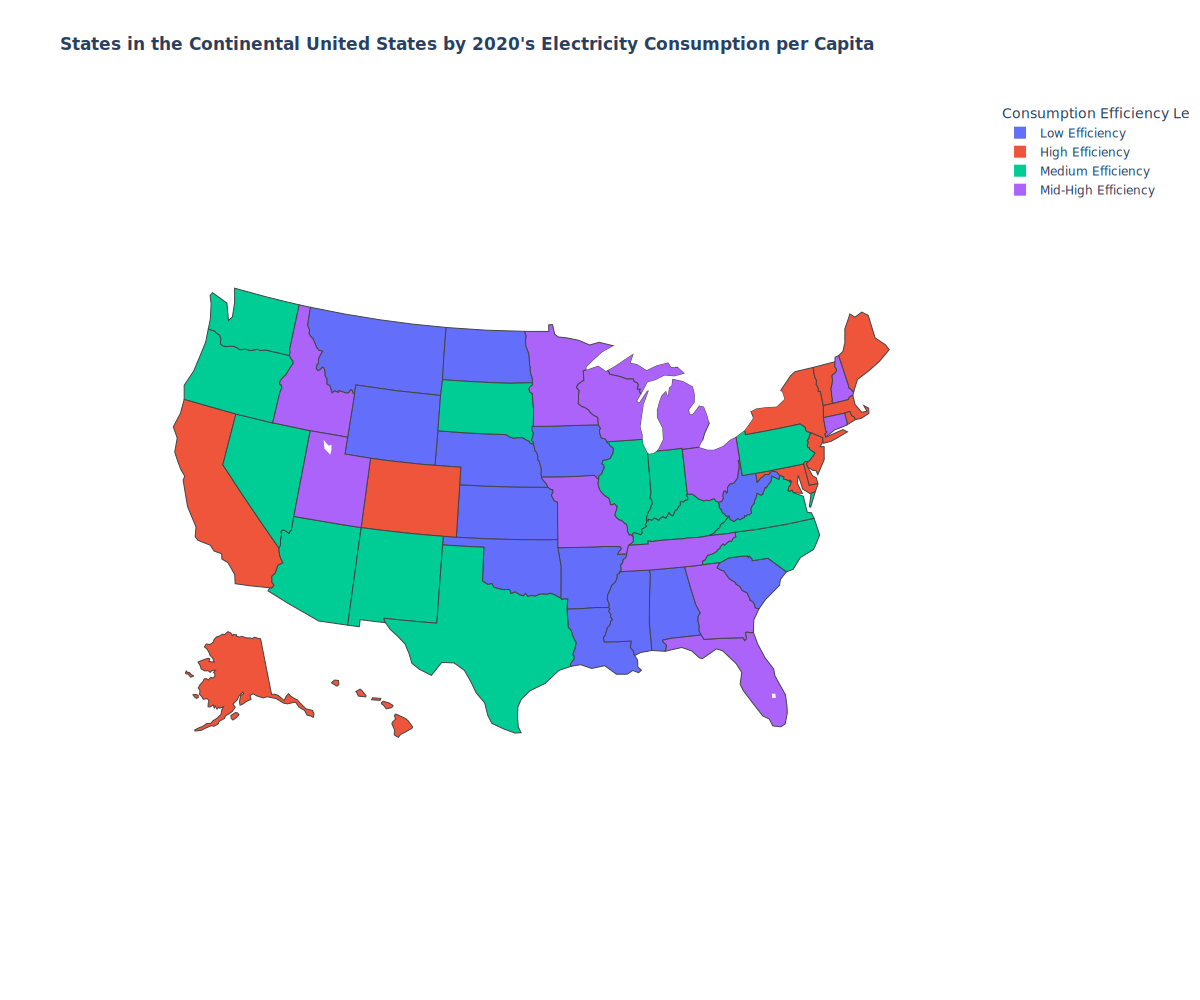

In [659]:
fig = px.choropleth(energy_metric, color="efficiency_level",
                    locations="state_init", locationmode="USA-states", scope="usa",
                    hover_data=["state", "electricity_generated", "consumption_per_head"],
                     title="<b>States in the Continental United States by 2020's Electricity Consumption per Capita</b>",
                    labels={"state":"States","electricity_generated":"Electricity Generated in Megawatt-hours",
                            "consumption_per_head":"Consumption per Capita", "state_init":"Territory Abbreviation",
                            "efficiency_level":"Consumption Efficiency Level"})
fig.update_layout(width=1200, height=1000)
fig.show()

The classification of the states' residential+commercial sectors end-use electricity consumption per capita are as follows:
- **Low Efficiency**: Alabama, Arkansas, Iowa, Kansas, Louisiana, Mississippi, Montana, Nebraska, North Dakota, Oklahoma, South Carolina, West Virginia and Wyoming.
- **Medium Efficiency**: Arizona, Illinois, Indiana, Kentucky, Nevada, New Mexico, North Carolina, Oregon, Pennsylvania, South Dakota, Texas, Virginia and Washington.
- **Mid-High Efficiency**: Connecticut, Florida, Georgia, Idaho, Michigan, Minnesota, Missouri, New Hampshire, Ohio, Tennessee, Utah and Wisconsin.
- **High Efficiency**: Alaska, California, Colorado, Delaware, District of Columbia, Hawaii, Maine, Maryland, Massachusetts, New Jersey, New York, Rhode Island and Vermont.


## How fast are US states in phasing-out coal since COP21? Compare the use of coal by all states for electricity generation before and after the adoption of the Paris Agreement(i.e 2015 vs 2020)

In [660]:
#Select coal entries in 2020 and 2015
coalenergy=energys.query("energy_source=='Coal' and (year==2015 or year==2020)")
#cast out unnecessary columns
coal_elect=coalenergy[['year','state','electricity_generated']]
#convert long table to wide table with each year having its own column
coal= pd.pivot_table(coal_elect, index = 'state', columns = 'year', values = 'electricity_generated' ).reset_index()
#calculate the change in coal-fired electricity and store in new colum
coal['change in elect'] = coal[2020] - coal[2015]
#assign increase to positive change and decrease to negative 
bins = [coal['change in elect'].min()-1, 0,coal['change in elect'].max()+1]
labels = ['decrease', 'increase']
coal['direction'] = pd.cut(coal['change in elect'], bins=bins, labels=labels)
coal


year,state,2015,2020,change in elect,direction
0,Alabama,41410429.0,21729524.0,-19680905.0,decrease
1,Alaska,667549.0,721789.0,54240.0,increase
2,Arizona,36167169.0,13747253.0,-22419916.0,decrease
3,Arkansas,21740033.0,15420998.0,-6319035.0,decrease
4,California,297874.0,290291.0,-7583.0,decrease
5,Colorado,31540895.0,19478405.0,-12062490.0,decrease
6,Connecticut,600469.0,-19082.0,-619551.0,decrease
7,Delaware,598588.0,102274.0,-496314.0,decrease
8,Florida,42904009.0,16597728.0,-26306281.0,decrease
9,Georgia,37130630.0,13913935.0,-23216695.0,decrease


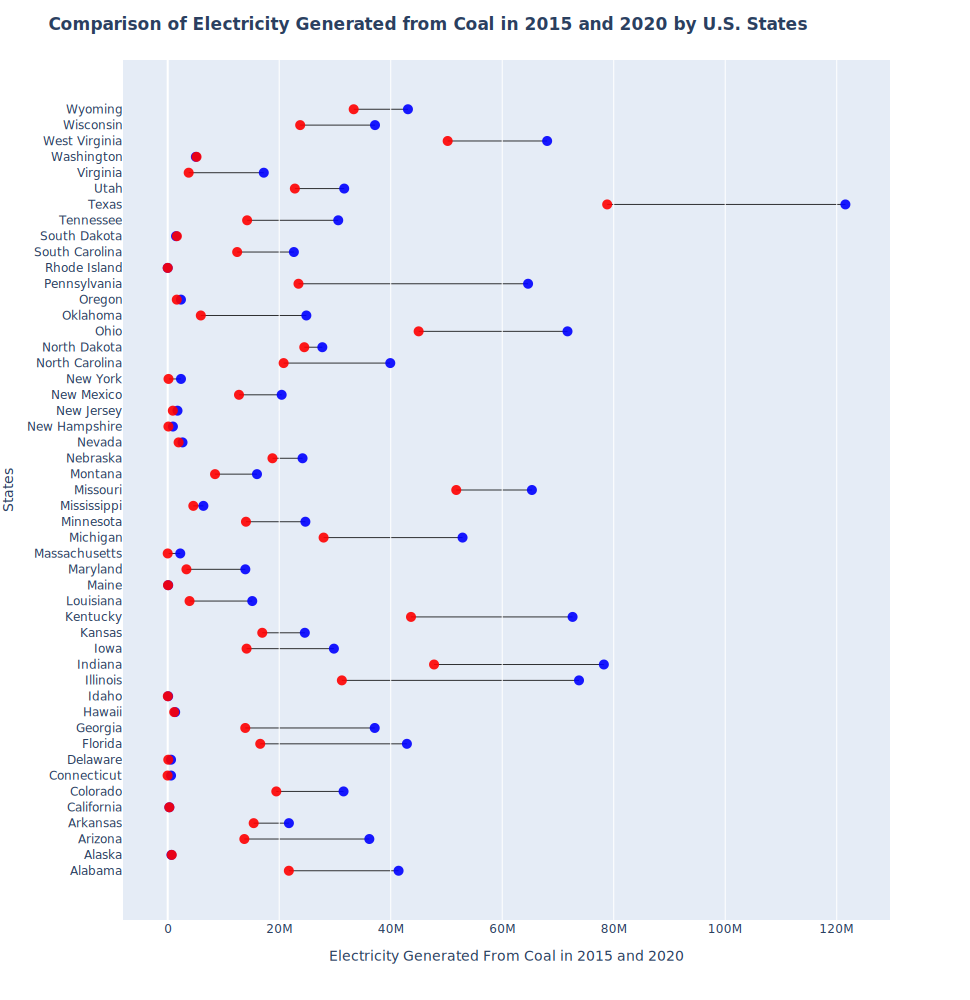

In [661]:
#scatter plot
fig = px.scatter(coal, x=[2015,2020], y="state", hover_name = 'state',width=1300,color_discrete_map= {'2020': 'red', '2015': 'blue' },
                 height=1000,labels={'value':'Electricity Generated From Coal in 2015 and 2020','state':'States'})
fig.update(layout_showlegend=False)

# iterate on each state
for i in coal["state"]:
    # filter by state
    coal_state = coal[coal["state"] == i]
    
    fig.add_shape(
        type="line", opacity = 0.8,
        layer="below",
        # connect the two markers
        y0=coal_state.state.values[0], x0=coal_state[2015].values[0],
        y1=coal_state.state.values[0], x1=coal_state[2020].values[0], 
        line=dict(color="black",width=1)
    )
    fig.update_traces(marker=dict(size=10, opacity = 0.9)) 
#specify the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "<b>%{y}</b>",
        "Coal-Fired Electricity Generated : %{x}"]))
fig.update_layout(width=970, height=1000,
     xaxis=dict(showgrid=True), 
     yaxis=dict(showgrid=False),
     title = "<b>Comparison of Electricity Generated from Coal in 2015 and 2020 by U.S. States</b>"
)
fig.show()

All states are quick with phasing out coal witn the exception of Alaska, Washington and South Dakota which increased its coal-fired electricity generation with an additional 54240, 153143, 118301 megawattshours recorded in 2020. Contrarily, Alaska had its highest electricity generation sourced from natural gas in 2020 while Wahington and South Dakota had theirs from renewables.Texas noted the highest decrease in coal-fired electricity while Connecticut recorded negative coal-electricity generation (the system consumes more power and Conecticut has little fossil reserve). Rhode Island has completely phased-out coal. 

## How fast are U.S. states adopting natural gas as a transition fuel since COP21? Compare the use of natural gas by all states for electricity generation before and after the adoption of the Paris Agreement(i.e 2015 vs 2020)

In [662]:
#obtain natural gas entries in 2015 and 2020
naturalg=energys.query("energy_source=='Natural Gas' and (year==2015 or year==2020)")
naturalg
#filter
natural=naturalg[['year','state','electricity_generated']]
#cast to pivot to create seperate column for each year
natural= pd.pivot_table(natural, index = 'state', columns = 'year', values = 'electricity_generated' ).reset_index()
#calculate the change in natural gas-fired electricity generated
natural['Change in elect'] = natural[2020] - natural[2015]
#assign increase for positive change and decrease for negative change
bins = [natural['Change in elect'].min()-1, 0,natural['Change in elect'].max() +1]
labels = ['decrease', 'increase']
natural['direction'] = pd.cut(natural['Change in elect'], bins=bins, labels=labels)
natural

year,state,2015,2020,Change in elect,direction
0,Alabama,55844457.0,55229674.0,-614783.0,decrease
1,Alaska,3089713.0,2640760.0,-448953.0,decrease
2,Arizona,33657102.0,50777570.0,17120468.0,increase
3,Arkansas,14866286.0,18307327.0,3441041.0,increase
4,California,116139609.0,92046685.0,-24092924.0,decrease
5,Colorado,11643750.0,18171338.0,6527588.0,increase
6,Connecticut,17362309.0,23536813.0,6174504.0,increase
7,Delaware,6689267.0,4818094.0,-1871173.0,decrease
8,District of Columbia,22653.0,133536.0,110883.0,increase
9,Florida,155824152.0,189420462.0,33596310.0,increase


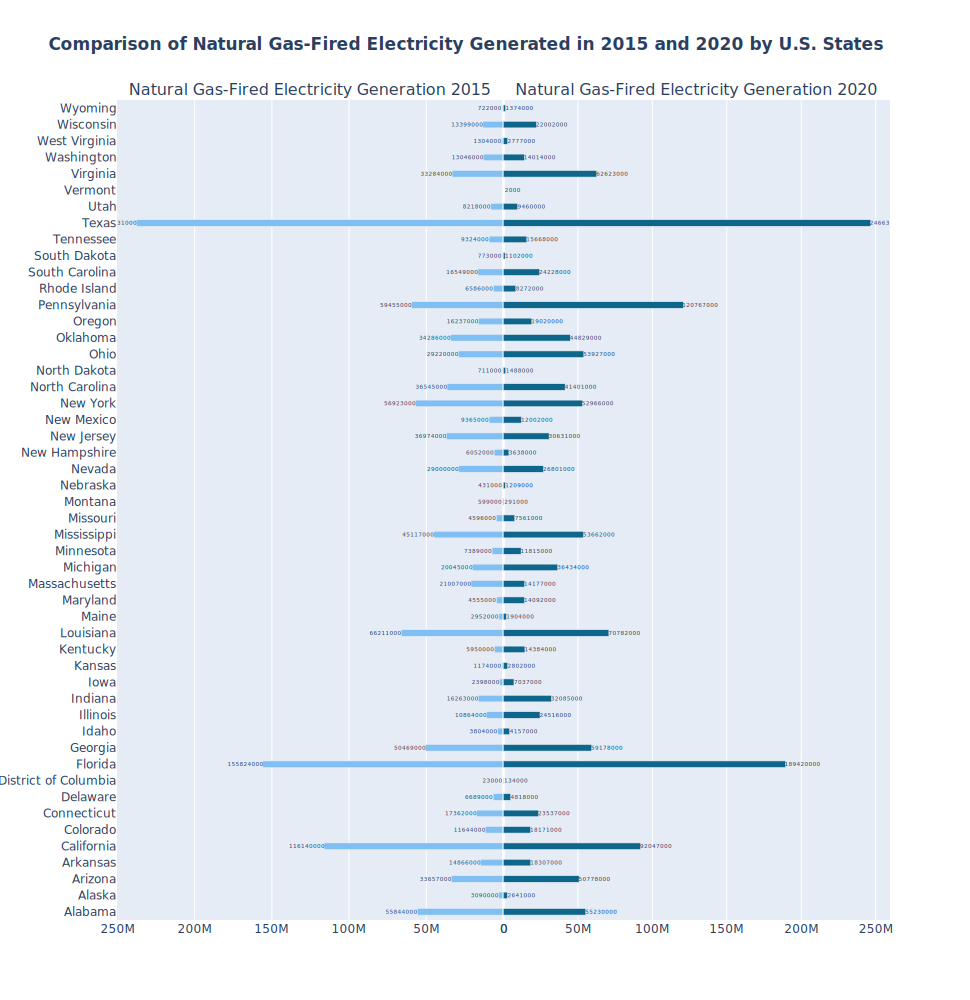

In [663]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=True, horizontal_spacing=0, subplot_titles=['Natural Gas-Fired Electricity Generation 2015','Natural Gas-Fired Electricity Generation 2020'])
#add bar plots 
fig.append_trace(go.Bar(name = 'Natural Gas Electricity Generation in 2015', y=natural['state'], x=natural[2015], orientation='h', width=0.4, showlegend=False, marker_color='#80bff3', text = np.round(np.abs(natural[2015]), -3)), 1, 1)
fig.append_trace(go.Bar(name = 'Natural Gas Electricity Generation in 2020', y=natural['state'], x=natural[2020], orientation='h', width=0.4, showlegend=False, marker_color='#0e668b', text = np.round(natural[2020], -3)), 1, 2)

#specify the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "<b>%{y}</b>",
        "Natural Gas-Fired Electricity Generated : %{x}"]))
fig.update_traces(textposition='outside')

fig.update_layout(title = "<b>Comparison of Natural Gas-Fired Electricity Generated in 2015 and 2020 by U.S. States</b>", height = 800)
fig.update_layout(width=970, height=1000)

#reverse the range so that 2015 comes before 2020
fig['layout']['xaxis1']['autorange'] = "reversed"
fig.show()

COP21 brought with it a 2020 decrease in natural gas-fired electricity in 11 states (Alabama, Alaska, California, Delaware, Maine, Massachusetts, Montana, Nevada, New Hampshire, New Jersey, and New York). While an increase was noted for 39 states and 1 capital (Arizona, Arkansas, Colorado, Connecticut, Florida, Georgia, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maryland, Michigan, Minnesota, Mississippi, Missouri, Nebraska, New Mexico, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming and the District of Columbia). Hawaii is excluded because it does not use natural gas for electricity generation.

## How green has U.S. states' electricity generation been since COP21? Compare the use of renewable energy by all states for electricity generation before and after the adoption of the Paris Agreement(i.e 2015 vs 2020)

In [664]:
#Select renewable energy entries in 2015 and 2020
renewabless=energyh.query("energy_source=='Renewables' and (year==2015 or year==2020)")
#reduce the number of columns
renew=renewabless[['year','state','electricity_generated']]
#assign new columns for each year
renew= pd.pivot_table(renew, index = 'state', columns = 'year', values = 'electricity_generated' ).reset_index()
renew
#find the change in renewable electricity generation
renew['change in elect'] = renew[2020] - renew[2015]
#positive change=increase, negative change=decrease
bins = [renew['change in elect'].min()-1, 0,renew['change in elect'].max()+1]
labels = ['decrease', 'increase']
renew['direction'] = pd.cut(renew['change in elect'], bins=bins, labels=labels)
renew

year,state,2015,2020,change in elect,direction
0,Alabama,4.383696e+06,4.256079e+06,-1.276170e+05,decrease
1,Alaska,4.458788e+05,4.828862e+05,3.700750e+04,increase
2,Arizona,1.790677e+06,2.198381e+06,4.077040e+05,increase
3,Arkansas,1.008549e+06,1.160256e+06,1.517070e+05,increase
4,California,8.473731e+06,1.174447e+07,3.270742e+06,increase
5,Colorado,1.524807e+06,2.762262e+06,1.237455e+06,increase
6,Connecticut,2.207334e+05,2.224822e+05,1.748767e+03,increase
7,Delaware,4.331200e+04,4.379800e+04,4.860000e+02,increase
8,District of Columbia,3.099900e+04,3.377350e+04,2.774500e+03,increase
9,Florida,1.346930e+06,2.691666e+06,1.344736e+06,increase


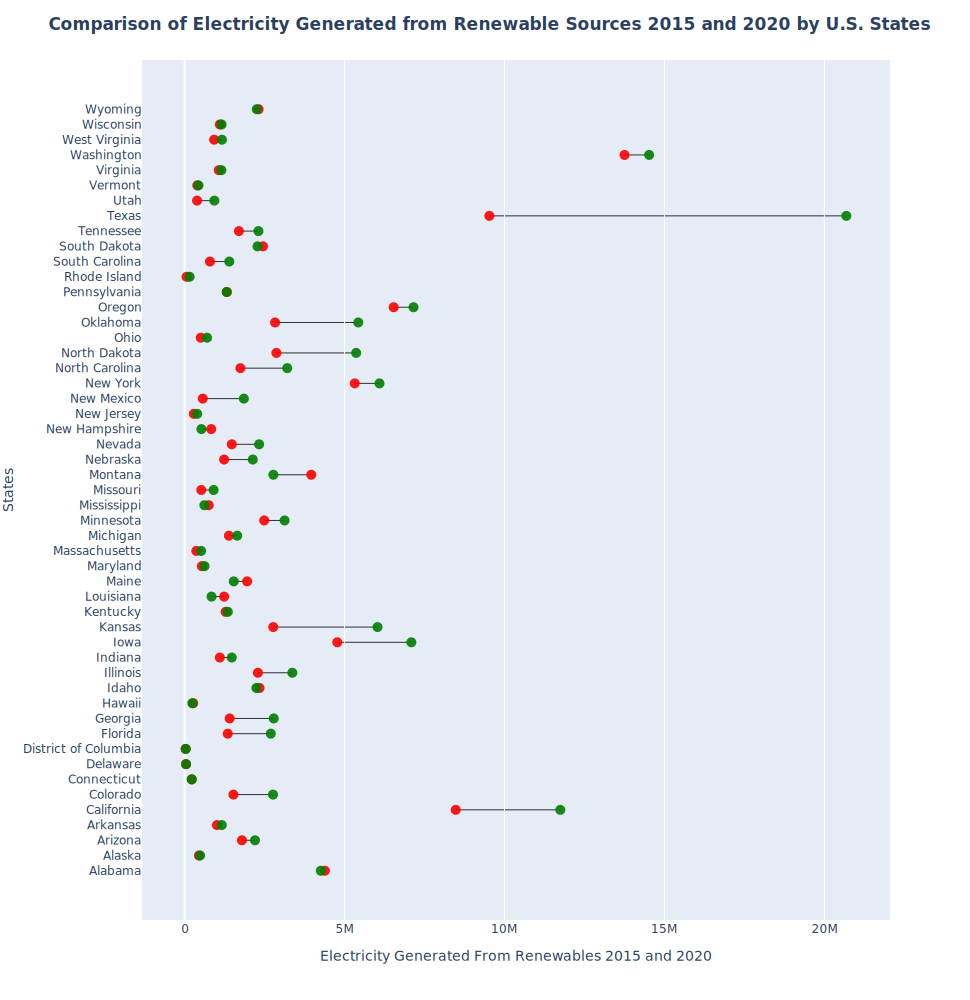

In [665]:
#plot the points
fig = px.scatter(renew, x=[2015,2020], y="state", color_discrete_map= {'2020': 'green', '2015': 'red' },hover_name = 'state',width=1300,
                 height=1000,labels={'value':'Electricity Generated From Renewables 2015 and 2020','state':'States'})
fig.update(layout_showlegend=False)

# iterate on each state
for i in renew["state"]:
    # filter by state
    renew_state = renew[renew["state"] == i]
    
    fig.add_shape(
        type="line", opacity = 0.8,
        layer="below",
        # add connectors
        y0=renew_state.state.values[0], x0=renew_state[2015].values[0],
        y1=renew_state.state.values[0], x1=renew_state[2020].values[0], 
        line=dict(color="black",width=1)
    )
    fig.update_traces(marker=dict(size=10, opacity = 0.9)) 
fig.update_layout(width=970, height=1000,
     xaxis=dict(showgrid=True), 
     yaxis=dict(showgrid=False),
     title = "<b>Comparison of Electricity Generated from Renewable Sources 2015 and 2020 by U.S. States</b>"
)
#specify the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "<b>%{y}</b>",
        "Renewables Electricity Generated : %{x}"]))
#render plot
fig.show()

11 states (Alabama, Hawaii, Idaho, Louisiana, Maine, Mississippi, Montana, New Hampshire, Pennsylvania, South Dakota and Wyoming) saw a decrease in renewables-sourced electricity in 2020 despite the 2015 Paris Agreement. 39 states and 1 capital saw an increase namely: Alaska, Arizona, Arkansas, California, Colorado,Connecticut, Delaware, Florida, Georgia, Illinois, Indiana, Iowa, Kansas, Kentucky, Maryland, Massachusetts, Michigan, Minnesota, Missouri, Nebraska, Nevada, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Rhode Island, South Carolina, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin and District of Columbia. With Texas recording the highest increase in renewables-sourced electricity

## How pink has the U.S. states' electricity generation been since COP21? Compare the use of nuclear energy by all states for electricity generation before and after the adoption of the Paris Agreement(i.e 2015 vs 2020)

In [666]:
#pull out nuclear entries in 2015 and 2020
nuclearg=energys.query("energy_source=='Nuclear' and (year==2015 or year==2020)")
nuclearg
#select necessary columns
nuclear=nuclearg[['year','state','electricity_generated']]
#split year column into 2: 2015 and 2020
nuclear= pd.pivot_table(nuclear, index = 'state', columns = 'year', values = 'electricity_generated' ).reset_index()
#calculate the change in electricity generated 
nuclear[2020].fillna(0,inplace=True)
nuclear['Change in elect'] = nuclear[2020] - nuclear[2015]

#assign comments to negative and positive increase
bins = [nuclear['Change in elect'].min()-1, 0,nuclear['Change in elect'].max() +1]
labels = ['decrease', 'increase']
nuclear['direction'] = pd.cut(nuclear['Change in elect'], bins=bins, labels=labels)
nuclear

year,state,2015,2020,Change in elect,direction
0,Alabama,41951382.0,43550647.0,1599265.0,increase
1,Arizona,32525595.0,31552433.0,-973162.0,decrease
2,Arkansas,13837794.0,15063049.0,1225255.0,increase
3,California,18505385.0,16258698.0,-2246687.0,decrease
4,Connecticut,17410917.0,15714855.0,-1696062.0,decrease
5,Florida,28121916.0,29419352.0,1297436.0,increase
6,Georgia,33838462.0,32825697.0,-1012765.0,decrease
7,Illinois,97282139.0,100246068.0,2963929.0,increase
8,Iowa,5243446.0,2904863.0,-2338583.0,decrease
9,Kansas,8630178.0,10582482.0,1952304.0,increase


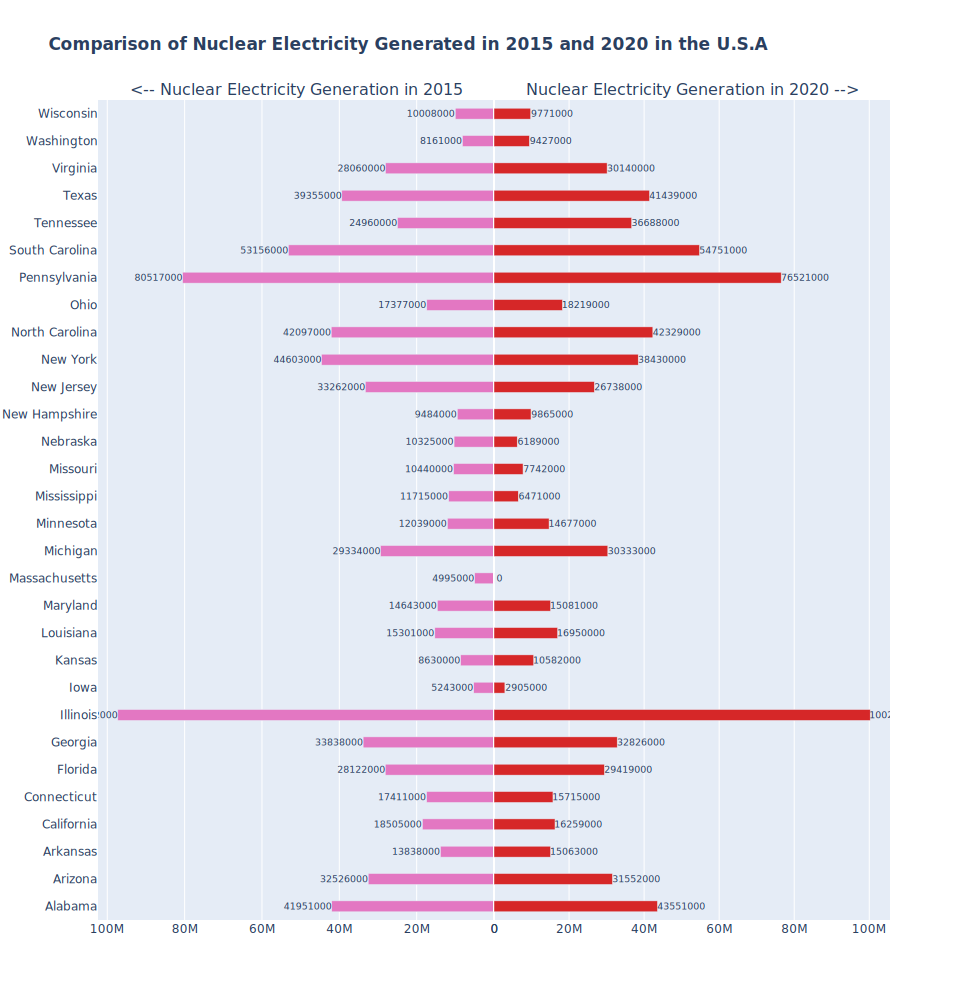

In [667]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=True, horizontal_spacing=0, subplot_titles=['<-- Nuclear Electricity Generation in 2015', 'Nuclear Electricity Generation in 2020 -->'])
#add bars 
fig.append_trace(go.Bar(name = 'Nuclear Electricity Generation in 2015', y=nuclear['state'], x=nuclear[2015], orientation='h', width=0.4, showlegend=False, marker_color='#e377c2', text = np.round(np.abs(nuclear[2015]), -3)), 1, 1)
fig.append_trace(go.Bar(name = 'Nuclear Electricity Generation in 2020', y=nuclear['state'], x=nuclear[2020], orientation='h', width=0.4, showlegend=False, marker_color='#d62728',text = np.round(nuclear[2020], -3)), 1, 2)

#specify the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "<b>%{y}</b>",
        "Nuclear Electricity Generated : %{x}"]))
fig.update_traces(textposition='outside')

fig.update_layout(title = "<b>Comparison of Nuclear Electricity Generated in 2015 and 2020 in the U.S.A</b>", height = 800)
fig.update_layout(width=970, height=1000)

#reverse the order
fig['layout']['xaxis1']['autorange'] = "reversed"
#render
fig.show()

in 2020, 5 years after COP21, Nuclear-sourced electricity generation increased in 17 states namely: Alabama, Arkansas, Florida, Illinois, Kansas, Louisiana, Maryland, Michigan, Minnesota, New Hampshire, North Carolina, Ohio, South Carolina, Tennessee, Texas, Virginia and Washington. Nuclear-sourced electricity generation reduced in 13 states namely: Arizona, California, Connecticut, Georgia, Iowa, Massachusetts, Mississippi,Missouri, Nebraska, New Jersey, New York, Pennsylvania, Wisconsin. Tennessee recorded the highest increase, while New Jersey recorded the highest decrease.

## For the High-Efficient states, how clean has their electricity been since the adoption of the Paris Agreement? Combine the electricity generated from renewables, nuclear and natural gas for 2015 and 2020 and compare.

In [668]:
#pull columns for state with high efficienct
high_eff=energy_metric[energy_metric.efficiency_level=="High Efficiency"]
#create a copy
transient=energyh.copy()
#label renewable natural gas and nuclear as transition fuels
transient=transient.query("(energy_source=='Renewables' or energy_source=='Natural Gas'or energy_source=='Nuclear') and (year==2015 or year==2020) and state in @high_eff.state")
transient.energy_source.replace(['Renewables','Natural Gas','Nuclear'],'Transition Fuels',inplace=True)
transition=transient[['year','state','electricity_generated']]
#split year column into 2
transition= pd.pivot_table(transition, index = 'state', columns = 'year', values = 'electricity_generated' ).reset_index()
#calculate change in electricity generated a
transition['Change in elect'] = transition[2020] - transition[2015]
#label the change in electricity generated as an increase or a decrease
bins = [transition['Change in elect'].min()-1, 0,transition['Change in elect'].max() +1]
labels = ['decrease', 'increase']
transition['direction'] = pd.cut(transition['Change in elect'], bins=bins, labels=labels)
#add colours based on increase or decrease and store in a new column called direction color
transition['direction color'] = transition['direction'].replace('increase', '#1a9d41').replace('decrease', '#f15656')
transition


year,state,2015,2020,Change in elect,direction,direction color
0,Alaska,9.746456e+05,9.144610e+05,-6.018460e+04,decrease,#f15656
1,California,2.155123e+07,2.116852e+07,-3.827131e+05,decrease,#f15656
2,Colorado,2.970371e+06,4.963559e+06,1.993188e+06,increase,#1a9d41
3,Delaware,1.704801e+06,1.237372e+06,-4.674288e+05,decrease,#f15656
4,District of Columbia,2.682600e+04,6.702767e+04,4.020167e+04,increase,#1a9d41
5,Hawaii,2.679240e+05,2.401582e+05,-2.776583e+04,decrease,#f15656
6,Maine,2.152218e+06,1.596526e+06,-5.556913e+05,decrease,#f15656
7,Maryland,3.127094e+06,4.611338e+06,1.484244e+06,increase,#1a9d41
8,Massachusetts,3.523553e+06,2.466733e+06,-1.056820e+06,decrease,#f15656
9,New Jersey,1.023876e+07,8.476569e+06,-1.762188e+06,decrease,#f15656


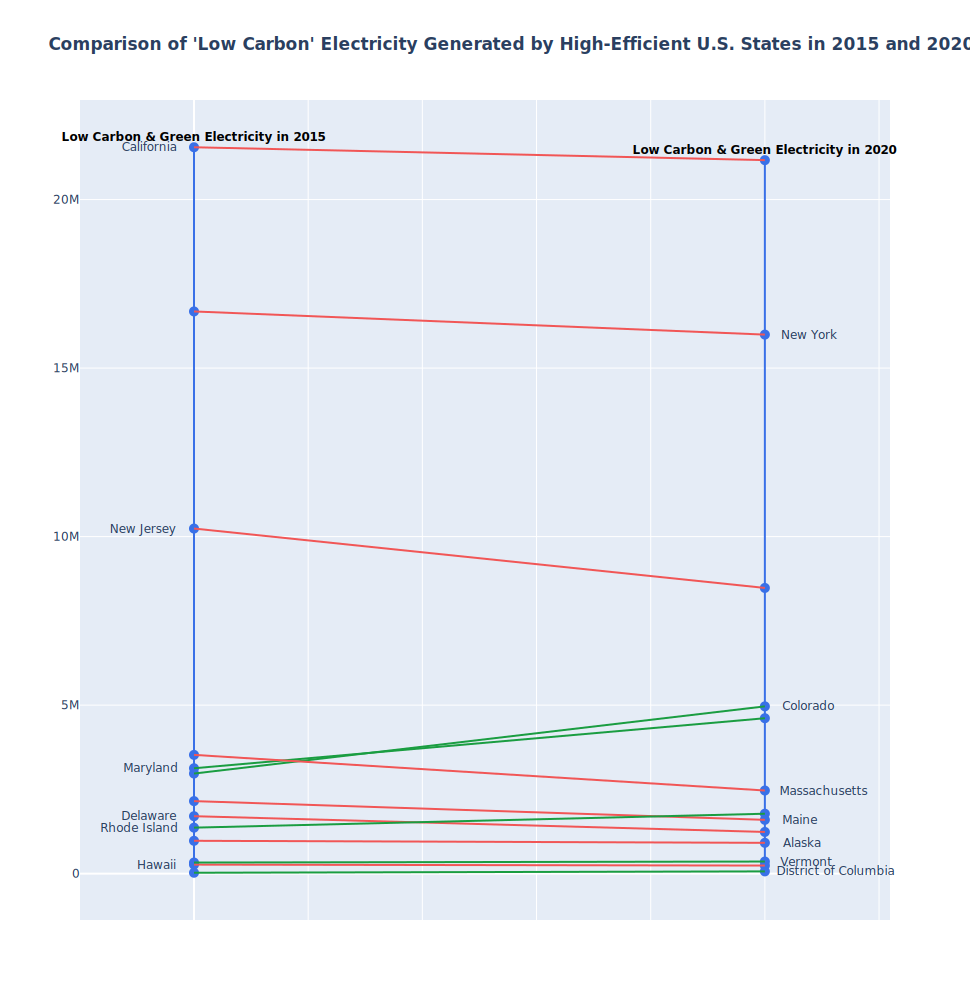

In [669]:
#scatter plots
fig = go.Figure(go.Scatter(x = [0] * len(transition), y =transition[2015] ,  mode = 'lines+markers+text', showlegend = False, hovertext = nuclear['state'], name = 'Low Carbon and Green Electricity in 2015',marker=dict(
            color='#3970e7', 
            size=10)
))
fig.add_trace(go.Scatter( x = [1] * len(transition), y = transition[2020], mode = 'lines+markers+text', showlegend = False, hovertext = nuclear['state'], name = 'Low Carbon and Green Electricity in 2020',marker=dict(
            color='#3970e7',
            size=10)
))

#add the connectors
for y0, y1, c in zip(transition[2015], transition[2020], transition['direction color']):
    fig.add_shape(type='line', x0=0, x1=1, y0=y0, y1=y1, line=dict(
        color=c))
#Add text on top of the connectors
fig.add_annotation(x=0, y=transition[2015].max()+500,
            text="<b>Low Carbon & Green Electricity in 2015</b>",
            showarrow=False,
            yshift=10, font = dict(color = 'black'))
fig.add_annotation(x=1, y=transition[2020].max()+500,
            text="<b>Low Carbon & Green Electricity in 2020</b>",
            showarrow=False,
            yshift=10, font = dict(color = 'black'))

#Add the state names
for i in range(len(transition)):
    if i%2 == 1:
        fig.add_annotation(x = 0-0.03, y = transition.iloc[i][2015], xanchor = 'right', text = transition.iloc[i]['state'], showarrow = False)
    else:
        fig.add_annotation(x = 1+0.03, y = transition.iloc[i][2020], xanchor = 'left', text = transition.iloc[i]['state'], showarrow = False)
#specify the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "<b>%{x}</b>",
        "Combined Low-Carbon and Green Electricity Generated: %{y}"]))   
#adjust the axes and titles
fig.update_layout(title = "<b>Comparison of 'Low Carbon' Electricity Generated by High-Efficient U.S. States in 2015 and 2020</b>",
                  width=970, height=1000)
fig.update_xaxes(showticklabels = False)
fig.show()

Despite being highly efficient, New York, California, New Jersey, Massachusetts, Maine, Alaska, Hawaii and Delaware all had a decrease in their combined renewables, nuclear and natural gas-fired generation. However, Colorado, Maryland, Rhode Island, Vermont and the District of Columbia increased their combined output in 2020. Colorado recorded the highest increase.

## For the Low-Efficient states, how clean has their electricity been since the adoption of the Paris Agreement? Combine the electricity generated from renewables, nuclear and natural gas for 2015 and 2020 and compare.

In [670]:
#select low-efficient states entries
low_eff=energy_metric[energy_metric.efficiency_level=="Low Efficiency"]
#create a copy
transientt=energyh.copy()
#select low-efficient states and their entries for renewables,natural gas and nuclear for 2020 and 2015
transientt=transientt.query("(energy_source=='Renewables' or energy_source=='Natural Gas' or energy_source=='Nuclear') and (year==2015 or year==2020) and state in @low_eff.state")
#combine renewables,natural gas and nuclear to transition fuels
transientt.energy_source.replace(['Renewables','Natural Gas','Nuclear'],'Transition Fuels',inplace=True)
#select important columns
transitions=transientt[['year','state','electricity_generated']]
#split year column into 2
transitions= pd.pivot_table(transitions, index = 'state', columns = 'year', values = 'electricity_generated' ).reset_index()
#find the difference in electricity generation
transitions['Change in elect'] = transitions[2020] - transitions[2015]
#assign increase and decrease to positive and negative changes respectively
bins = [transitions['Change in elect'].min()-1, 0,transitions['Change in elect'].max() +1]
labels = ['decrease', 'increase']
transitions['direction'] = pd.cut(transitions['Change in elect'], bins=bins, labels=labels)
#assign colours to increase and decrease
transitions['direction color'] = transitions['direction'].replace('increase', '#1a9d41').replace('decrease', '#f15656')
transitions


year,state,2015,2020,Change in elect,direction,direction color
0,Alabama,2.218939e+07,1.930077e+07,-2.888613e+06,decrease,#f15656
1,Arkansas,4.820975e+06,5.595951e+06,7.749759e+05,increase,#1a9d41
2,Iowa,4.455417e+06,6.482684e+06,2.027267e+06,increase,#1a9d41
3,Kansas,3.480881e+06,6.250361e+06,2.769480e+06,increase,#1a9d41
4,Louisiana,1.704307e+07,1.518166e+07,-1.861412e+06,decrease,#f15656
5,Mississippi,1.458452e+07,1.239597e+07,-2.188547e+06,decrease,#f15656
6,Montana,3.118236e+06,2.360486e+06,-7.577497e+05,decrease,#f15656
7,Nebraska,2.615309e+06,2.578000e+06,-3.730917e+04,decrease,#f15656
8,North Dakota,2.328628e+06,4.393300e+06,2.064672e+06,increase,#1a9d41
9,Oklahoma,7.320908e+06,1.105693e+07,3.736022e+06,increase,#1a9d41


In [671]:
transitions[transitions["direction"]=="decrease"].state.unique()

array(['Alabama', 'Louisiana', 'Mississippi', 'Montana', 'Nebraska'],
      dtype=object)

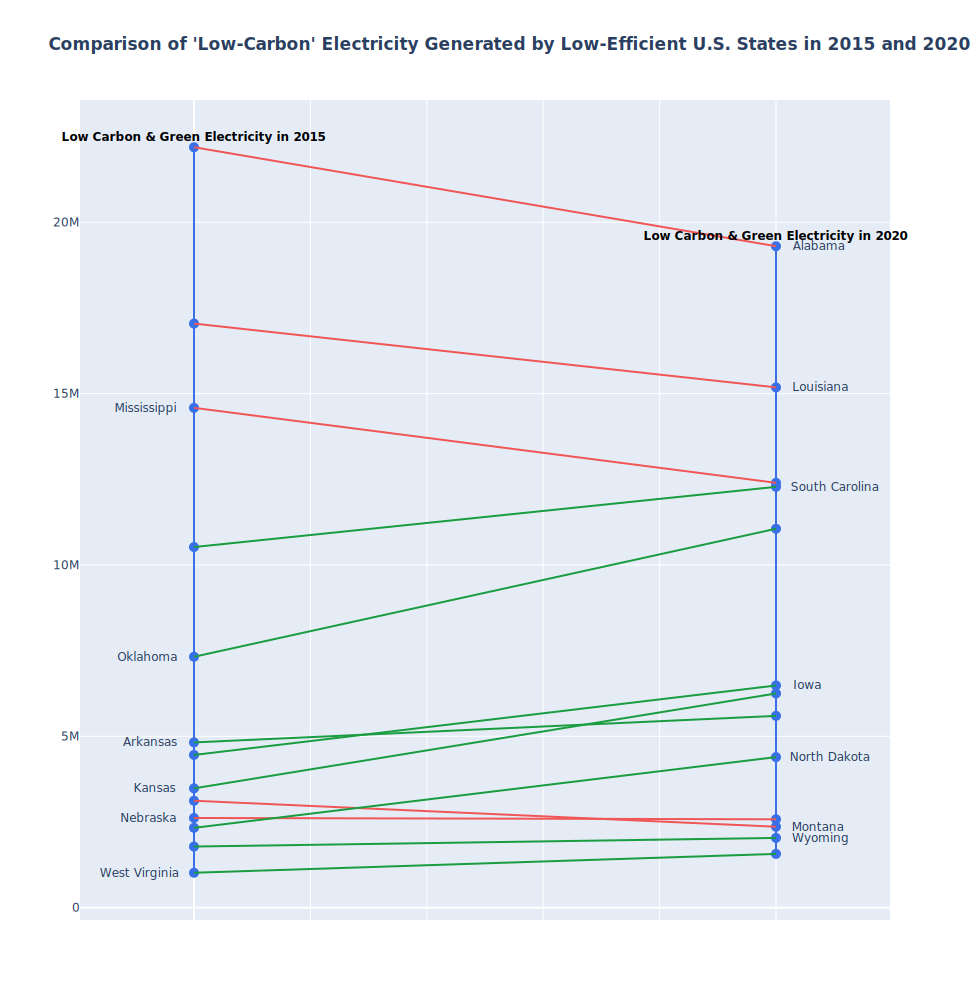

In [672]:
#scatter plot for 2015 and 2020
fig = go.Figure(go.Scatter(x = [0] * len(transitions), y =transitions[2015] ,  mode = 'lines+markers+text', showlegend = False, hovertext = nuclear['state'], name = 'Low Carbon and Green Electricity in 2015',marker=dict(
            color='#3970e7', 
            size=10)
))
fig.add_trace(go.Scatter( x = [1] * len(transitions), y = transitions[2020], mode = 'lines+markers+text', showlegend = False, hovertext = nuclear['state'], name = 'Low Carbon and Green Electricity in 2020',marker=dict(
            color='#3970e7',
            size=10)
))

#add the connectors
for y0, y1, c in zip(transitions[2015], transitions[2020], transitions['direction color']):
    fig.add_shape(type='line', x0=0, x1=1, y0=y0, y1=y1, line=dict(
        color=c))
#Add text on top of the connectors
fig.add_annotation(x=0, y=transitions[2015].max()+500,
            text="<b>Low Carbon & Green Electricity in 2015</b>",
            showarrow=False,
            yshift=10, font = dict(color = 'black'))
fig.add_annotation(x=1, y=transitions[2020].max()+500,
            text="<b>Low Carbon & Green Electricity in 2020</b>",
            showarrow=False,
            yshift=10, font = dict(color = 'black'))

#Add the names of the states
for i in range(len(transitions)):
    if i%2 == 1:
        fig.add_annotation(x = 0-0.03, y = transitions.iloc[i][2015], xanchor = 'right', text = transitions.iloc[i]['state'], showarrow = False)
    else:
        fig.add_annotation(x = 1+0.03, y = transitions.iloc[i][2020], xanchor = 'left', text = transitions.iloc[i]['state'], showarrow = False)
#specify the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "<b>%{x}</b>",
        "Combined Low-Carbon and Green Electricity Generated : %{y}"]))        

#adjust the titles and axes
fig.update_layout(title = "<b>Comparison of 'Low-Carbon' Electricity Generated by Low-Efficient U.S. States in 2015 and 2020</b>",width=970, height=1000)
fig.update_xaxes(showticklabels = False)
fig.show()

Alabama, Louisiana, Mississippi, Montana, Nebraska saw an decrease in their combined low-carbon and green elctricity generation in 2020 compared to 2015 levels. Despite being low-efficient, Arkansas, Iowa, Kansas, North Dakota, Oklahoma, South Carolina, West Virginia and Wyoming had an increase compared to 2015 levels. 

## Was the electricity generated dependent on the population in 2020? How?



In [673]:
#correlation matrix
energy_metric.corr()

,population_2020,land_area_sqkm,electricity_generated,resandcommerc,consumption_per_head
population_2020,1.000000,0.152059,0.807993,0.807993,-0.215128
land_area_sqkm,0.152059,1.000000,0.190382,0.190382,0.061206
electricity_generated,0.807993,0.190382,1.000000,1.000000,0.029011
resandcommerc,0.807993,0.190382,1.000000,1.000000,0.029011
consumption_per_head,-0.215128,0.061206,0.029011,0.029011,1.000000


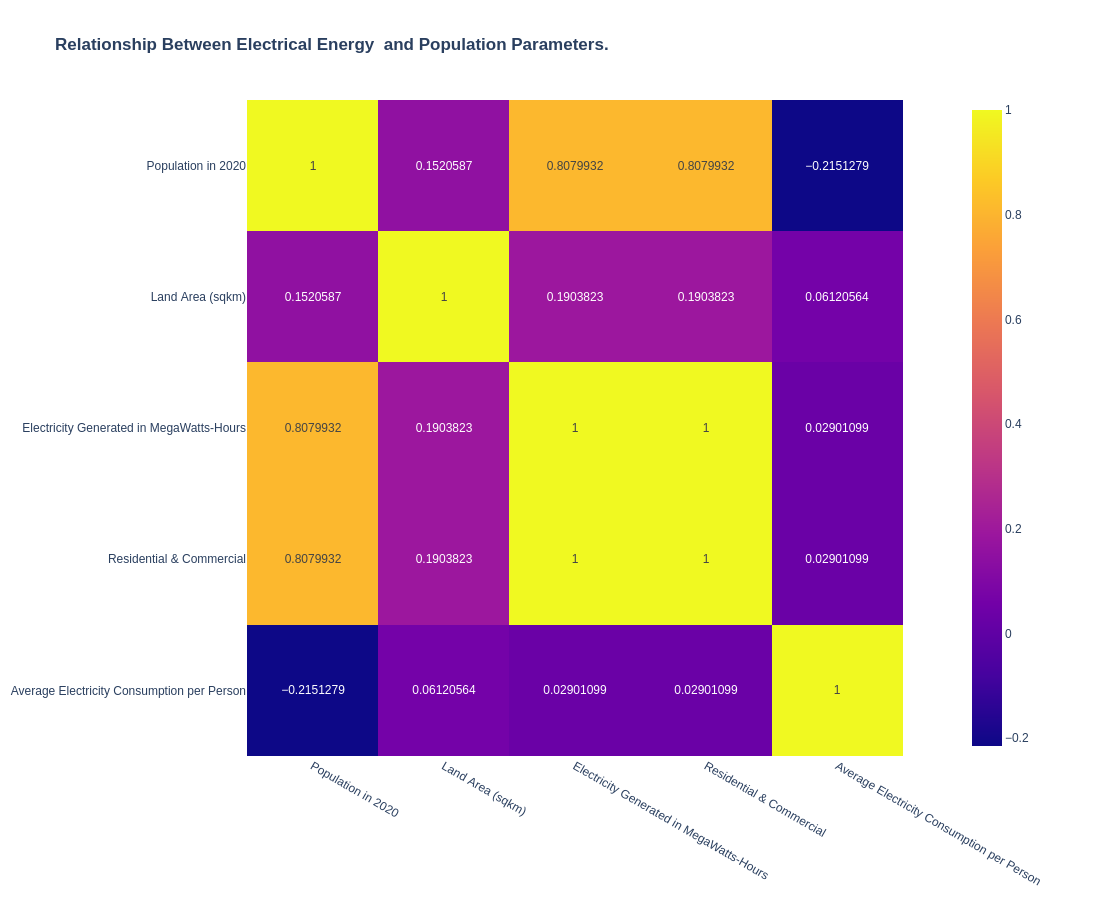

In [676]:
energy_correlation=energy_metric.corr()
#convert to dataframe
energycorr=pd.DataFrame(energy_correlation)
#rename columns
energycorr.columns=["Population in 2020","Land Area (sqkm)",
                    "Electricity Generated in MegaWatts-Hours","Residential & Commercial",
                    "Average Electricity Consumption per Person"]
#rename rows
energycorr.rename({"population_2020":"Population in 2020","land_area_sqkm":"Land Area (sqkm)",
                    "electricity_generated":"Electricity Generated in MegaWatts-Hours",
                    "resandcommerc":"Residential & Commercial","consumption_per_head":"Average Electricity Consumption per Person"},
                    inplace=True)
#plot heatmap
fig=px.imshow(energycorr,text_auto=True,title="<b>Relationship Between Electrical Energy  and Population Parameters.</b>")
fig.update_layout(width=1100,height=900)
fig.show(renderer="png")


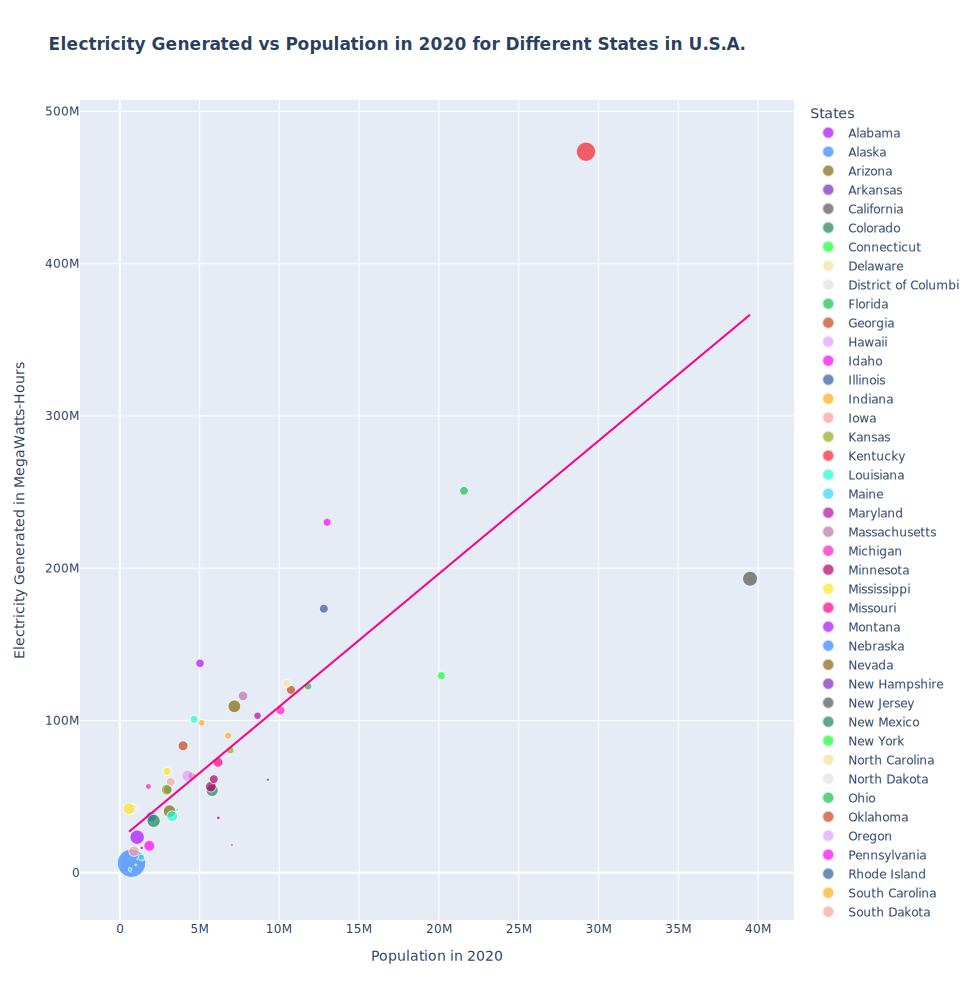

In [675]:
#scatterplot
fig=px.scatter(energy_metric, x='population_2020', y="electricity_generated",
           color='state', size='land_area_sqkm',trendline="ols",
           trendline_scope="overall", color_discrete_sequence=
           px.colors.qualitative.Alphabet, width=970, height=1000,
           title="<b>Electricity Generated vs Population in 2020 for Different States in U.S.A.</b>",
       labels={"population_2020":"Population in 2020",
               "electricity_generated":"Electricity Generated in MegaWatts-Hours",
               "state":"States","land_area_sqkm":"Land Area in Square Kilometers"})
fig.show()

A correlation coefficient close to 1 implies a strong positive relation. 0.807993 suggest a positive relationship between the population and the quantity of electricity generated. That means states with a large population generates more electricity. Some states however, defy this dependence, for instance, California is more populated than Texas but generates less electricity compared to Texas. Texas, however, has a larger land area. Therefore, in some cases, land area could play a factor. 

## Limitations
The author ignored the presence of outliers in the energy dataset for 2 reasons:
- The is coming from a very authoritative source (the EIA) and has a reputable history of providing accurate and precise data.
- Electricity is sourced from energy sources which are critically both geopolitically and economically. For instance, according to the EIA, natural gas price is dependent on supply-side factors such as the amount of natural gas production, the level of natural gas in storage, the volumes of natural gas imports and exports. it is also dependent on demand-side factors such as variations in winter and summer weather, the level of economic growth and the availability and prices of other fuels

## Conclusion
**Trends**
- Coal is gradually been phased out with Natural gas use for electricity generation exceeding it in 2016, a year after the COP21. Renewables have maintained a steady increase since 2007 and exceeded coal-fired electricity in 2020. In 2020, Nuclear electricity generation also exceeded coal-fired electricity generation. Petroleum-Fired electricity started plummetting in 2005 after peaking in 1998. Petroleum, other gases and others energy sources were all the least used energy energy sources for electricity generation in the U.S.A from 1990-2020.
- Texas has generated the highest cummulative electricity generation between 1900-2020 while the District of Columbia generated the least.
- In 2020, 19 states majorly sourced their electricity from natural gas. Renewables was the most-used energy source in 10 states. Coal was also the most used electricity source in 10 states in 2020  while Nuclear was the most used in 6 states.

**Efficiency**
- High Efficiency: 12 states and 1 capital
- Medium Efficiency: 13 states
- Low Efficiency: 13 states
- Mid-High Efficiency: 12 states

**Comparison of Electricity Generation Level in 2020 and 2015 to Indicate the Likely Effect of the Climate Urgency**
- Coal-Fired Electricity: Decreased in 3 states. Increased in 47 states and 1 capital.
- Natural Gas-Fired Electricity: Decreased in 11 states. Increased in 39 states and 1 capital.
- Nuclear-Sourced Electricity: Decreased in 13 states. Increased in 17 states
- Renewables-Sourced Electricity: Decreased in 11 states. Increased in 39 states and 1 capital.

**Relationship**
- Electricity generation seemed fairly positively dependent on population size,with land area playing in a factor in few occasions.


